In [2]:
%matplotlib notebook
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

Using TensorFlow backend.
I:\ML\Anaconda3\envs\dlwin36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [64]:
mx = 20
x = mx*2*random(mx*10)-mx
y = x/16+2

x=np.array([[i] for i in x])
plt.plot(x, y, '.')

<IPython.core.display.Javascript object>


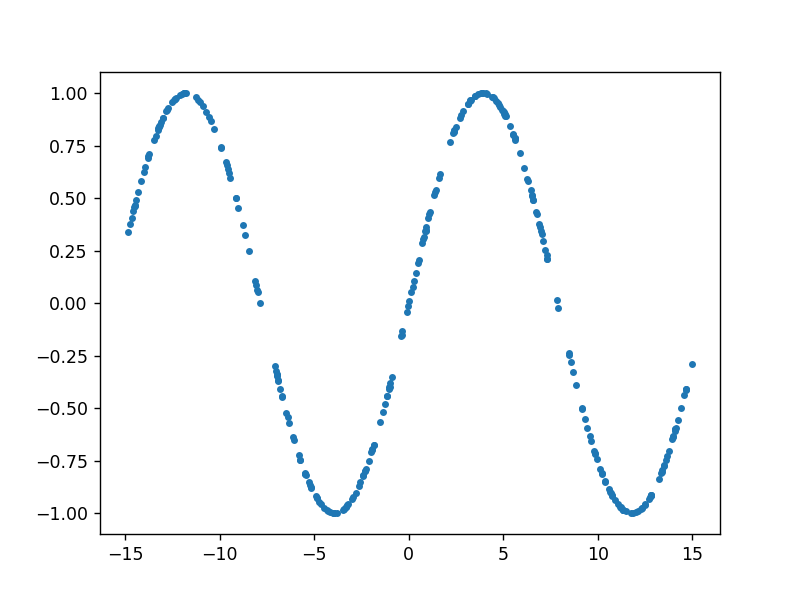

In [118]:
mx = 15
dense = 20
x = mx*2*random(mx*dense)-mx
y = np.sin(x/2.5)

x=np.array([[i] for i in x])
fig = plt.figure()
plt.plot(x, y, '.')

In [66]:
mx = 20
dense = 5
x = mx*2*random(mx*dense)-mx
y = np.dot(x, 0.31) + 1.2

x=np.array([[i] for i in x])
plt.plot(x, y, '.')

In [22]:
x = random((30,2))
y = np.dot(x, [2., 3.]) + 1.

In [74]:
x = random((30,1))
y = np.dot(x, [2.]) + 1.

<IPython.core.display.Javascript object>


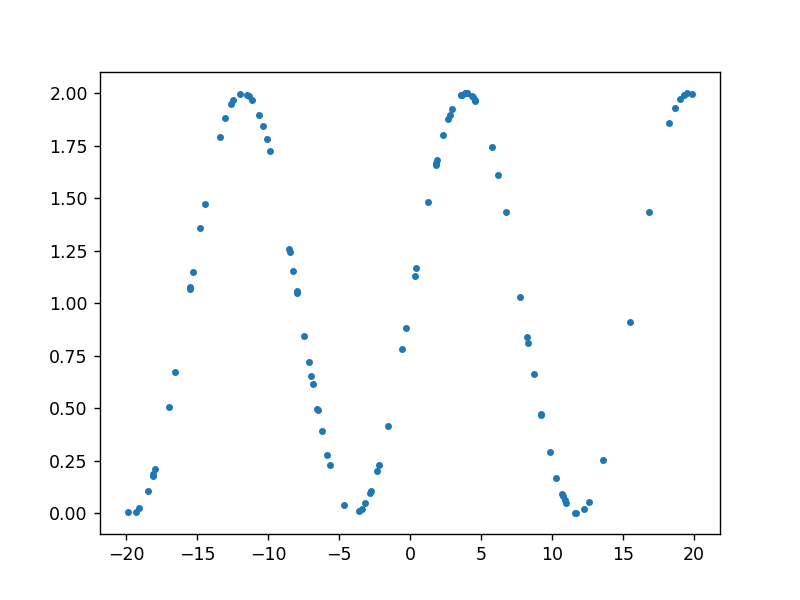

In [117]:
mx = 20
dense = 5
x = mx*2*random((mx*dense,1))-mx
y = np.sin(x/2.5) + 1.

fig = plt.figure()
plt.plot(x, y, '.')

<IPython.core.display.Javascript object>


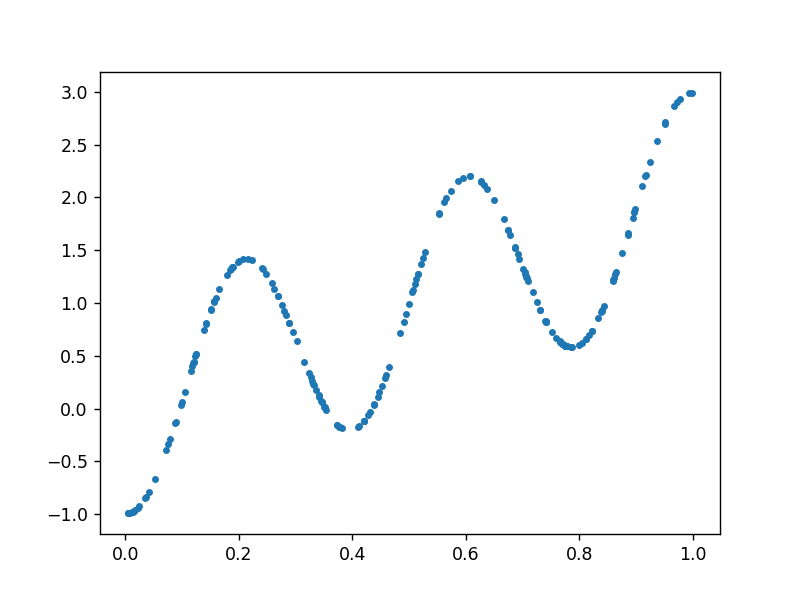

In [164]:
mx = 200
dense = 1
x = random((mx*dense,1))
y = np.sin((mx*2*x-mx)/25) + x*2

fig = plt.figure()
plt.plot(x, y, '.')

In [165]:
shade21 = Sequential([ Dense(1, input_shape=(2,)) ])
shade21.compile(optimizer=SGD(lr=0.1), loss='mse')

In [166]:
shade11 = Sequential([ Dense(1, input_shape=(1,)) ])
shade11.compile(optimizer=SGD(lr=0.1), loss='mse')

In [167]:
shade3 = Sequential([ 
    Dense(32, input_shape=(1,)), 
    Dense(32), 
    Dense(1), 
])
shade3.compile(optimizer=SGD(lr=0.1), loss='mse')

In [168]:
#lm = shade21
lm = shade3


In [131]:
y[:5]

array([[1.7981],
       [1.9326],
       [0.2191],
       [0.3364],
       [0.0288]])

In [132]:
x[:5]

array([[0.6386],
       [0.9678],
       [0.0513],
       [0.7417],
       [0.0242]])

In [169]:
lm.evaluate(x, y, verbose=0)

1.4992156267166137

In [170]:
lm.fit(x, y, epochs=50, batch_size=50)

Epoch 1/50
200/200 [==============================] - 0s - loss: 0.8580     
Epoch 2/50
200/200 [==============================] - 0s - loss: 0.5730     
Epoch 3/50
200/200 [==============================] - 0s - loss: 0.5512     
Epoch 4/50
200/200 [==============================] - 0s - loss: 0.4759     
Epoch 5/50
200/200 [==============================] - 0s - loss: 0.6082     
Epoch 6/50
200/200 [==============================] - 0s - loss: 0.4727     
Epoch 7/50
200/200 [==============================] - 0s - loss: 0.4711     
Epoch 8/50
200/200 [==============================] - 0s - loss: 0.4786     
Epoch 9/50
200/200 [==============================] - 0s - loss: 0.4661     
Epoch 10/50
200/200 [==============================] - 0s - loss: 0.4777     
Epoch 11/50
200/200 [==============================] - 0s - loss: 0.4856     
Epoch 12/50
200/200 [==============================] - 0s - loss: 0.4817     
Epoch 13/50
200/200 [==============================] - 0s - loss: 0.5019 

In [141]:
lm.evaluate(x, y, verbose=0)

0.5209322237968445

In [151]:
lm.get_weights()

[array([[ 0.221 , -0.2285, -0.0576,  0.4127, -0.301 ,  0.3452, -0.3848,  0.0349, -0.1363,  0.3967,
          0.2737, -0.286 ,  0.2344, -0.2623,  0.2604, -0.0777,  0.1919, -0.1342,  0.2292, -0.2268,
          0.3613,  0.2471, -0.229 ,  0.3048,  0.0023, -0.2028, -0.2578,  0.362 ,  0.0123, -0.3197,
          0.1551, -0.1192]], dtype=float32),
 array([-0.0101,  0.0736,  0.0131, -0.008 ,  0.0678, -0.0957,  0.0683, -0.0242,  0.0177, -0.0177,
        -0.0273, -0.0286,  0.0227,  0.0192, -0.0185,  0.064 ,  0.0549, -0.0034, -0.0007, -0.0463,
         0.0139, -0.0249,  0.0084, -0.0319,  0.1301,  0.0347,  0.0737, -0.0003,  0.0168,  0.0284,
        -0.0603,  0.0328], dtype=float32),
 array([[ 0.0597, -0.1046, -0.0937, ...,  0.2673, -0.2138, -0.1222],
        [-0.0471, -0.0265, -0.2459, ...,  0.014 , -0.2809,  0.1052],
        [ 0.2502, -0.2497, -0.2477, ...,  0.0809,  0.2264,  0.2469],
        ...,
        [ 0.1124, -0.1485,  0.0832, ..., -0.1267,  0.1899, -0.2691],
        [ 0.1387, -0.1777,  0.01

In [171]:
yy=lm.predict(x)

<IPython.core.display.Javascript object>


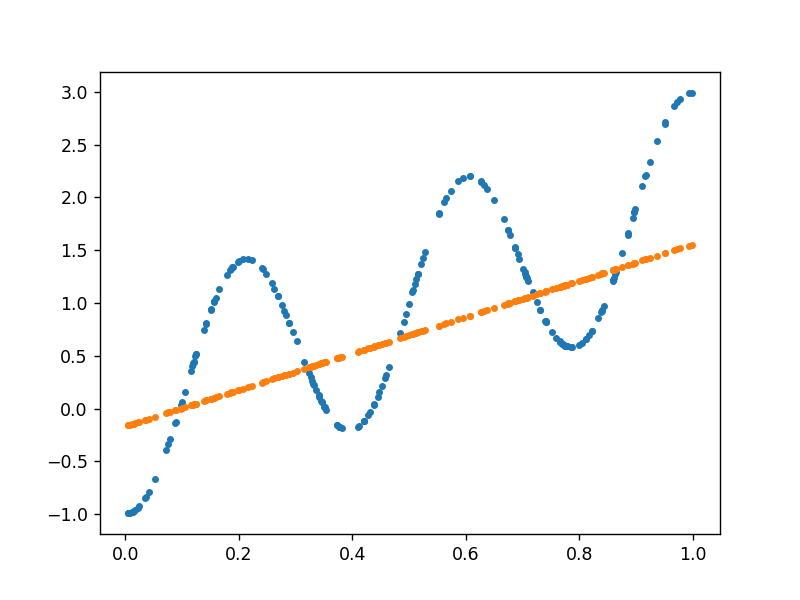

In [172]:
fig = plt.figure()
plt.plot(x, y, '.')
plt.plot(x, yy, '.')